In [281]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter

import matplotlib.ticker as plticker


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


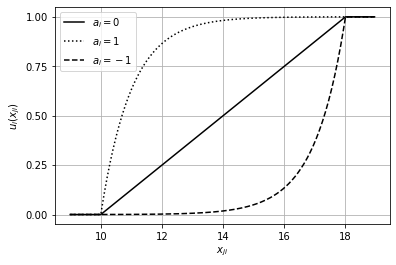

In [410]:
u2_min=10
u2_max=18


def u2(x,a):
    if x>u2_max:
        return 1
    elif x<u2_min: 
        return 0
    elif a == 0:
        return (1/(u2_max-u2_min))*(x-u2_min)
    else: 
        def b(x):
            return 1-math.e**(-a*x)
        return (b(x)-b(u2_min))/(b(u2_max)-b(u2_min))
    
def us2(x_list, a): #utility function for the list of values           
    return [u2(x, a) for x in x_list]

def b(x):
    return 1-math.e**(-a*x)

a=1

X = np.arange(u2_min-1,u2_max+1,0.05)
Y1 = [u2(x,a) for x in X]
Y2 = [u2(x,-a) for x in X]
Y3 = [u2(x,0) for x in X] 
plt.plot(X,Y3, label=r'$a_i=0$', color='black') 
plt.plot(X,Y1, label=r'$a_i=$' + str(a), color='black', linestyle='dotted') 
plt.plot(X,Y2, label=r'$a_i=-$' + str(a), color='black', linestyle='dashed') 
plt.xlabel(r"$x_{ji}$")
plt.ylabel(r"$u_i(x_{ji})$")

import matplotlib.ticker as plticker


plt.yticks(np.arange(0, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.savefig('u.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


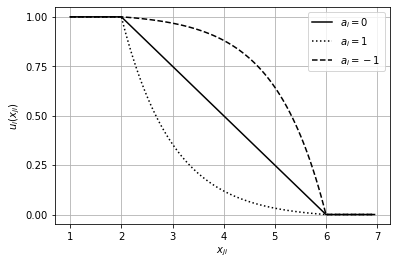

In [412]:
u1_min=2
u1_max=6

def u1(x,a):
    if x>u1_max:
        return 0
    elif x<u1_min: 
        return 1
    elif a == 0:
        return -(1/(u1_max-u1_min))*(x-u1_max)
    else: 
        def b(x):
            return 1-math.e**(-a*x)
        return (b(x)-b(u1_max))/(b(u1_min)-b(u1_max))
    
    
    
def us1(x_list, a): #utility function for the list of values           
    return [u1(x, a) for x in x_list]

def b(x):
    return 1-math.e**(-a*x)


a=1

X = np.arange(f_min-1,f_max+1,0.05)
Y1 = [u1(x,a) for x in X]
Y2 = [u1(x,-a) for x in X]
Y3 = [u1(x,0) for x in X] 
plt.plot(X,Y3, label=r'$a_i=0$', color='black') 
plt.plot(X,Y1, label=r'$a_i=$' + str(a), color='black', linestyle='dotted') 
plt.plot(X,Y2, label=r'$a_i=-$' + str(a), color='black', linestyle='dashed') 
plt.xlabel(r"$x_{ji}$")
plt.ylabel(r"$u_i(x_{ji})$")

import matplotlib.ticker as plticker


plt.yticks(np.arange(0, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.savefig('u.eps', format='eps')

(array([  5.,  23.,  65., 126., 190., 238., 190., 116.,  34.,  13.]),
 array([3.75906503, 3.89594289, 4.03282075, 4.16969861, 4.30657647,
        4.44345433, 4.58033219, 4.71721004, 4.8540879 , 4.99096576,
        5.12784362]),
 <BarContainer object of 10 artists>)

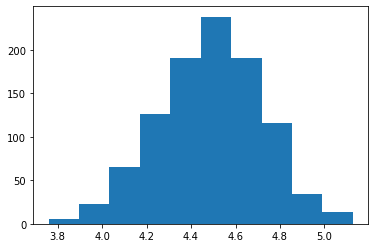

In [276]:
m = np.mean([4.7, 4.4, 4.3, 4.8, 4.2])
s = np.std([4.7, 4.4, 4.3, 4.8, 4.2])

plt.hist(np.random.normal(m, s, 1000))


In [256]:
np.std([4.7, 4.4, 4.3, 4.8, 4.2])

0.23151673805580444

In [329]:
d = [[4.7, 4.4, 4.3, 4.8, 4.2]
,[14.5, 14.5, 14.5, 10, 12]
,[11, 12, 12, 15.5, 8.5]
,[13, 13.5, 13.5, 12, 12.5]
,[10, 13, 13, 8.5, 16]
,[12, 14, 14, 10, 10]]



In [330]:
a_d = pd.DataFrame(d, columns=["A", "B", "C","D","E"], index=["bid", "fin", "tec", "mng", "has", "rep"])





In [331]:
a_d.T

,bid,fin,tec,mng,has,rep
A,4.7,14.5,11.0,13.0,10.0,12.0
B,4.4,14.5,12.0,13.5,13.0,14.0
C,4.3,14.5,12.0,13.5,13.0,14.0
D,4.8,10.0,15.5,12.0,8.5,10.0
E,4.2,12.0,8.5,12.5,16.0,10.0


In [332]:
w = [0.55, 0.15, 0.1, 0.1, 0.05, 0.05]



In [563]:
a_d.A

bid     4.7
fin    14.5
tec    11.0
mng    13.0
has    10.0
rep    12.0
Name: A, dtype: float64

In [465]:
def cal_post_mu(m=5, mu=[0,0,0,0,0,0], s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,0,0,0,0,0]):
    
    out_d = {} #dictionary that is returned
    
    i_t = [] #list to store index of maximum true multiattribute utility
    
    #list to store index of maximum 
    i_e = [] #estimates
    i_pr = [] #posterior right way
    i_pw = [] #posterior wrong way
    
    #list to store PDS for 
    d_e = [] #estimates
    d_pr = [] #posterior right way
    d_pw = [] #posterior wrong way
    
    eu_1 = [] 
    eu_2 = []
    eu_3 = []
    
    x_all= []
    xpji_all = []
    eu_all = []
    eu_pr_all = []
    eu_pw_all = []
    xjpr_all = []
    xjpw_all = []
    def cal_u(multiatt):
        
        u_1 = u1(multiatt[0], a[0])
        u_rest = [u2(multiatt[i], a[i]) for i in list(range(1, len(multiatt)))]
        ul = [u_1] + u_rest
        return np.dot(w, ul)
    
    for k in range(1000):
        x = []
        eu = []
        eu_pr = []
        eu_pw = []
        
        x_p_ji_l = []
        x_jp_r_l = []
        x_jp_w_l = []
        

        for j in range(m): #loop for generating m number of mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the m.a.utility of one mu alternative u(x_j) 
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the m.a.utility of one mu estimates u(y_j)
            
            x_jp_r = [] #one alternative, right way
            x_jp_w = [] #one alternative, wrong way
            
            for i in range(n): #loop for generating posterior mu for one alternative
                p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*y_j[i]
                p_var = (s[i]**2*t[i]**2)/(s[i]**2 + t[i]**2)
                
                x_p_ji = list(np.random.normal(p_mean, np.sqrt(p_var),1000))
                x_p_ji_l.append(x_p_ji)
                
                #right way
                if i==0:
                    x_jp_r.append(np.mean(us1(x_p_ji, a[i])))
                else:
                    x_jp_r.append(np.mean(us2(x_p_ji, a[i])))
                
                #wrong way
                x_jp_w.append(np.mean(x_p_ji))
                
            x_jp_r_l.append(x_jp_r)
            x_jp_w_l.append(x_jp_w)
                
            #right way
            eu_pr.append(np.dot(w, x_jp_r)) #append w_i*E[u(x)|y]
                
            #wrong way
            eu_pw.append(cal_u(x_jp_w)) #append u(x) of one posterior alternative (repeated 1000 times)            
            
        #index of true max
        max_ix = x.index(max(x))
        i_t.append(max_ix)
              
        ###Saving result from estimates
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)
        i_e.append(max_j)

        #disappointment 
        d = (x[max_j] - max_eu)/max_eu
        d_e.append(d)
        
        ###Saving result from posterior right way
        #Choose the alternative $j^$ with the highest expected utility
        max_eu1 = max(eu_pr)
        max_j1 = eu_pr.index(max_eu1)
        i_pr.append(max_j1)
        
        #disappointment 
        d2 = (x[max_j1]-max_eu1)/max_eu1
        d_pr.append(d2)
        
        #optimality gap E[u(X_{\kappa(u(Y))}-u(X_{\kappa(Z}] 
        eu_1.append(x[max_j]-x[max_j1])
        

        ###Saving result from posterior wrong way
        #Choose the alternative $j^$ with the highest expected utility
        max_eu2 = max(eu_pw)
        max_j2 = eu_pw.index(max_eu2)
        i_pw.append(max_j2)

        #disappointment 
        d3 = (x[max_j2]-max_eu2)/max_eu2
        d_pw.append(d3)    
        
        #optimality gap E[u(X_{\kappa(u(Y))}-u(Z_{\kappa(\tilde{Z})}] 
        eu_2.append(x[max_j]-x[max_j2])
        
        #optimality gap E[u(X_{\kappa(\tilde{Z})}) - u(X_{\kappa(Z))]
        eu_3.append(x[max_j2]- x[max_j1])
        
        xpji_all.append(x_p_ji_l)
        x_all.append(x)
        eu_all.append(eu)
        eu_pr_all.append(eu_pr)        
        eu_pw_all.append(eu_pw)
        
        xjpr_all.append(x_jp_r_l)
        xjpw_all.append(x_jp_w_l)
    
    out_d["x"] = x_all
    out_d["xpji"] = xpji_all
    out_d["eu"] = eu_all
    out_d["eu_pw"] = eu_pw_all
    out_d["eu_pr"] = eu_pr_all  
    
    out_d["xjprl"] = xjpr_all
    out_d["xjpwl"] = xjpw_all
    
    out_d["i_t"] = i_t
    out_d["i_e"] = i_e
    out_d["i_pr"] = i_pr
    out_d["i_pw"] = i_pw
    
    out_d["d_e"] = d_e
    out_d["d_pr"] = d_pr
    out_d["d_pw"] = d_pw
    
    out_d["eu_1"] = eu_1
    out_d["eu_2"] = eu_2
    out_d["eu_3"] = eu_3
    
    return out_d

In [466]:
#first supplier
d_A = cal_post_mu(mu=list(a_d.A), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,0,0,0,0,0])
d_B = cal_post_mu(mu=list(a_d.B), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,0,0,0,0,0])
d_C = cal_post_mu(mu=list(a_d.C), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,0,0,0,0,0])
d_D = cal_post_mu(mu=list(a_d.D), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,0,0,0,0,0])
d_E = cal_post_mu(mu=list(a_d.E), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[0,0,0,0,0,0])

In [414]:
a_d.A

bid     4.7
fin    14.5
tec    11.0
mng    13.0
has    10.0
rep    12.0
Name: A, dtype: float64

In [415]:
a_d

,A,B,C,D,E
bid,4.7,4.4,4.3,4.8,4.2
fin,14.5,14.5,14.5,10.0,12.0
tec,11.0,12.0,12.0,15.5,8.5
mng,13.0,13.5,13.5,12.0,12.5
has,10.0,13.0,13.0,8.5,16.0
rep,12.0,14.0,14.0,10.0,10.0


In [528]:
#first supplier
d_A = cal_post_mu(mu=list(a_d.A), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[1,0,0,0,0,0])
d_B = cal_post_mu(mu=list(a_d.B), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[1,0,0,0,0,0])
d_C = cal_post_mu(mu=list(a_d.C), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[1,0,0,0,0,0])
d_D = cal_post_mu(mu=list(a_d.D), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[1,0,0,0,0,0])
d_E = cal_post_mu(mu=list(a_d.E), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[1,0,0,0,0,0])

<AxesSubplot:>

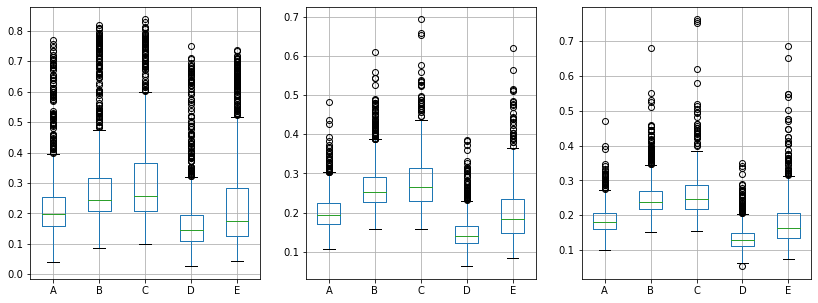

In [530]:
eu = pd.DataFrame()
var = "eu"
eu["A"] = pd.DataFrame(d_A["eu"])[0]
eu["B"] = pd.DataFrame(d_B["eu"])[0]
eu["C"] = pd.DataFrame(d_C["eu"])[0]
eu["D"] = pd.DataFrame(d_D["eu"])[0]
eu["E"] = pd.DataFrame(d_E["eu"])[0]

pr = pd.DataFrame()
var = "eu_pr"
pr["A"] = pd.DataFrame(d_A[var])[0]
pr["B"] = pd.DataFrame(d_B[var])[0]
pr["C"] = pd.DataFrame(d_C[var])[0]
pr["D"] = pd.DataFrame(d_D[var])[0]
pr["E"] = pd.DataFrame(d_E[var])[0]

pw = pd.DataFrame()
var = "eu_pw"
pw["A"] = pd.DataFrame(d_A[var])[0]
pw["B"] = pd.DataFrame(d_B[var])[0]
pw["C"] = pd.DataFrame(d_C[var])[0]
pw["D"] = pd.DataFrame(d_D[var])[0]
pw["E"] = pd.DataFrame(d_E[var])[0]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 5))
plt.figsize=(5,15)

eu.boxplot(ax=ax1)
pr.boxplot(ax=ax2)
pw.boxplot(ax=ax3)

In [531]:
#first supplier
d_A = cal_post_mu(mu=list(a_d.A), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[-1,0,0,0,0,0])
d_B = cal_post_mu(mu=list(a_d.B), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[-1,0,0,0,0,0])
d_C = cal_post_mu(mu=list(a_d.C), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[-1,0,0,0,0,0])
d_D = cal_post_mu(mu=list(a_d.D), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[-1,0,0,0,0,0])
d_E = cal_post_mu(mu=list(a_d.E), s=[1,1,1,1,1,1], t=[1,1,1,1,1,1], w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=[-1,0,0,0,0,0])

<AxesSubplot:>

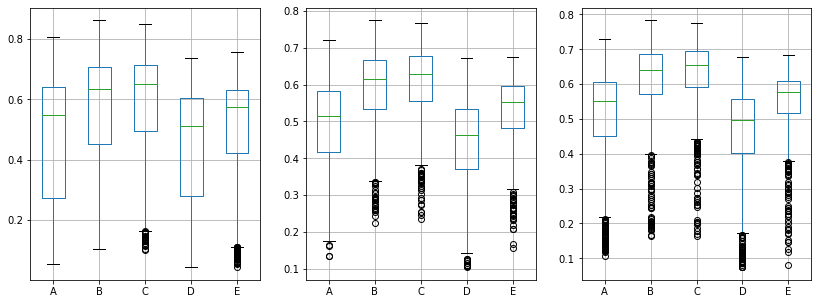

In [532]:
eu = pd.DataFrame()
var = "eu"
eu["A"] = pd.DataFrame(d_A["eu"])[0]
eu["B"] = pd.DataFrame(d_B["eu"])[0]
eu["C"] = pd.DataFrame(d_C["eu"])[0]
eu["D"] = pd.DataFrame(d_D["eu"])[0]
eu["E"] = pd.DataFrame(d_E["eu"])[0]

pr = pd.DataFrame()
var = "eu_pr"
pr["A"] = pd.DataFrame(d_A[var])[0]
pr["B"] = pd.DataFrame(d_B[var])[0]
pr["C"] = pd.DataFrame(d_C[var])[0]
pr["D"] = pd.DataFrame(d_D[var])[0]
pr["E"] = pd.DataFrame(d_E[var])[0]

pw = pd.DataFrame()
var = "eu_pw"
pw["A"] = pd.DataFrame(d_A[var])[0]
pw["B"] = pd.DataFrame(d_B[var])[0]
pw["C"] = pd.DataFrame(d_C[var])[0]
pw["D"] = pd.DataFrame(d_D[var])[0]
pw["E"] = pd.DataFrame(d_E[var])[0]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 5))
plt.figsize=(5,15)

eu.boxplot(ax=ax1)
pr.boxplot(ax=ax2)
pw.boxplot(ax=ax3)

<AxesSubplot:>

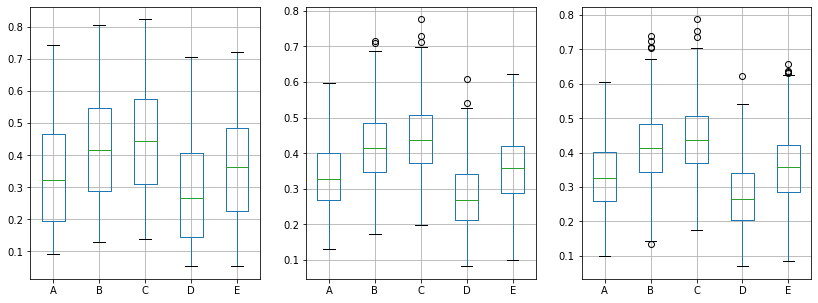

In [534]:
t = [1]+[0.1]*5
a = [0]*6
d_A = cal_post_mu(mu=list(a_d.A), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_B = cal_post_mu(mu=list(a_d.B), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_C = cal_post_mu(mu=list(a_d.C), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_D = cal_post_mu(mu=list(a_d.D), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_E = cal_post_mu(mu=list(a_d.E), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)

eu = pd.DataFrame()
var = "eu"
eu["A"] = pd.DataFrame(d_A["eu"])[0]
eu["B"] = pd.DataFrame(d_B["eu"])[0]
eu["C"] = pd.DataFrame(d_C["eu"])[0]
eu["D"] = pd.DataFrame(d_D["eu"])[0]
eu["E"] = pd.DataFrame(d_E["eu"])[0]

pr = pd.DataFrame()
var = "eu_pr"
pr["A"] = pd.DataFrame(d_A[var])[0]
pr["B"] = pd.DataFrame(d_B[var])[0]
pr["C"] = pd.DataFrame(d_C[var])[0]
pr["D"] = pd.DataFrame(d_D[var])[0]
pr["E"] = pd.DataFrame(d_E[var])[0]

pw = pd.DataFrame()
var = "eu_pw"
pw["A"] = pd.DataFrame(d_A[var])[0]
pw["B"] = pd.DataFrame(d_B[var])[0]
pw["C"] = pd.DataFrame(d_C[var])[0]
pw["D"] = pd.DataFrame(d_D[var])[0]
pw["E"] = pd.DataFrame(d_E[var])[0]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 5))
plt.figsize=(5,15)

eu.boxplot(ax=ax1)
pr.boxplot(ax=ax2)
pw.boxplot(ax=ax3)

<AxesSubplot:>

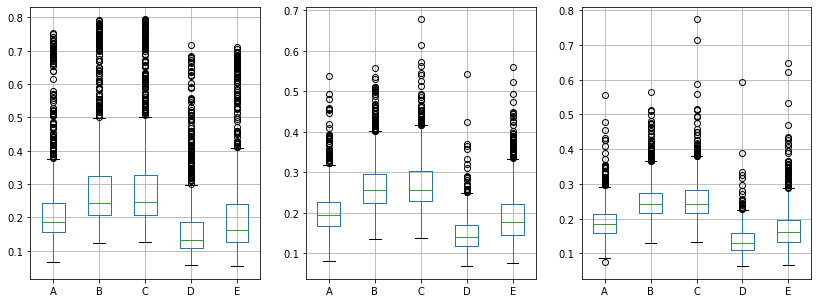

In [535]:
t = [1]+[0.1]*5
a = [1]+[0]*5

d_A = cal_post_mu(mu=list(a_d.A), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_B = cal_post_mu(mu=list(a_d.B), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_C = cal_post_mu(mu=list(a_d.C), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_D = cal_post_mu(mu=list(a_d.D), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_E = cal_post_mu(mu=list(a_d.E), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)

eu = pd.DataFrame()
var = "eu"
eu["A"] = pd.DataFrame(d_A["eu"])[0]
eu["B"] = pd.DataFrame(d_B["eu"])[0]
eu["C"] = pd.DataFrame(d_C["eu"])[0]
eu["D"] = pd.DataFrame(d_D["eu"])[0]
eu["E"] = pd.DataFrame(d_E["eu"])[0]

pr = pd.DataFrame()
var = "eu_pr"
pr["A"] = pd.DataFrame(d_A[var])[0]
pr["B"] = pd.DataFrame(d_B[var])[0]
pr["C"] = pd.DataFrame(d_C[var])[0]
pr["D"] = pd.DataFrame(d_D[var])[0]
pr["E"] = pd.DataFrame(d_E[var])[0]

pw = pd.DataFrame()
var = "eu_pw"
pw["A"] = pd.DataFrame(d_A[var])[0]
pw["B"] = pd.DataFrame(d_B[var])[0]
pw["C"] = pd.DataFrame(d_C[var])[0]
pw["D"] = pd.DataFrame(d_D[var])[0]
pw["E"] = pd.DataFrame(d_E[var])[0]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 5))
plt.figsize=(5,15)

eu.boxplot(ax=ax1)
pr.boxplot(ax=ax2)
pw.boxplot(ax=ax3)

<AxesSubplot:>

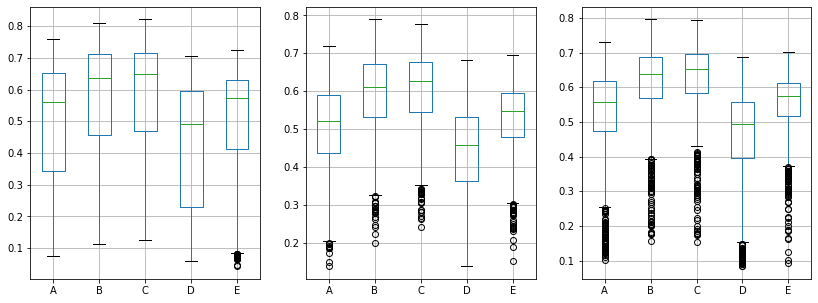

In [536]:
t = [1]+[0.1]*5
a = [-1]+[0]*5
d_A = cal_post_mu(mu=list(a_d.A), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_B = cal_post_mu(mu=list(a_d.B), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_C = cal_post_mu(mu=list(a_d.C), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_D = cal_post_mu(mu=list(a_d.D), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)
d_E = cal_post_mu(mu=list(a_d.E), s=[1,1,1,1,1,1], t=t, w=[0.55, 0.15, 0.1, 0.1, 0.05, 0.05], a=a)

eu = pd.DataFrame()
var = "eu"
eu["A"] = pd.DataFrame(d_A["eu"])[0]
eu["B"] = pd.DataFrame(d_B["eu"])[0]
eu["C"] = pd.DataFrame(d_C["eu"])[0]
eu["D"] = pd.DataFrame(d_D["eu"])[0]
eu["E"] = pd.DataFrame(d_E["eu"])[0]

pr = pd.DataFrame()
var = "eu_pr"
pr["A"] = pd.DataFrame(d_A[var])[0]
pr["B"] = pd.DataFrame(d_B[var])[0]
pr["C"] = pd.DataFrame(d_C[var])[0]
pr["D"] = pd.DataFrame(d_D[var])[0]
pr["E"] = pd.DataFrame(d_E[var])[0]

pw = pd.DataFrame()
var = "eu_pw"
pw["A"] = pd.DataFrame(d_A[var])[0]
pw["B"] = pd.DataFrame(d_B[var])[0]
pw["C"] = pd.DataFrame(d_C[var])[0]
pw["D"] = pd.DataFrame(d_D[var])[0]
pw["E"] = pd.DataFrame(d_E[var])[0]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 5))
plt.figsize=(5,15)

eu.boxplot(ax=ax1)
pr.boxplot(ax=ax2)
pw.boxplot(ax=ax3)

<AxesSubplot:>

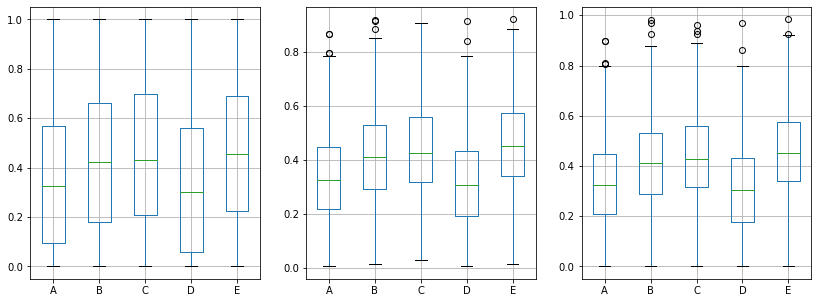

In [537]:
t = [1]+[0.1]*5
a = [0]*6
w = [1] + [0]*5

d_A = cal_post_mu(mu=list(a_d.A), s=[1,1,1,1,1,1], t=t, w=w, a=a)
d_B = cal_post_mu(mu=list(a_d.B), s=[1,1,1,1,1,1], t=t, w=w, a=a)
d_C = cal_post_mu(mu=list(a_d.C), s=[1,1,1,1,1,1], t=t, w=w, a=a)
d_D = cal_post_mu(mu=list(a_d.D), s=[1,1,1,1,1,1], t=t, w=w, a=a)
d_E = cal_post_mu(mu=list(a_d.E), s=[1,1,1,1,1,1], t=t, w=w, a=a)

eu = pd.DataFrame()
var = "eu"
eu["A"] = pd.DataFrame(d_A["eu"])[0]
eu["B"] = pd.DataFrame(d_B["eu"])[0]
eu["C"] = pd.DataFrame(d_C["eu"])[0]
eu["D"] = pd.DataFrame(d_D["eu"])[0]
eu["E"] = pd.DataFrame(d_E["eu"])[0]

pr = pd.DataFrame()
var = "eu_pr"
pr["A"] = pd.DataFrame(d_A[var])[0]
pr["B"] = pd.DataFrame(d_B[var])[0]
pr["C"] = pd.DataFrame(d_C[var])[0]
pr["D"] = pd.DataFrame(d_D[var])[0]
pr["E"] = pd.DataFrame(d_E[var])[0]

pw = pd.DataFrame()
var = "eu_pw"
pw["A"] = pd.DataFrame(d_A[var])[0]
pw["B"] = pd.DataFrame(d_B[var])[0]
pw["C"] = pd.DataFrame(d_C[var])[0]
pw["D"] = pd.DataFrame(d_D[var])[0]
pw["E"] = pd.DataFrame(d_E[var])[0]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 5))
plt.figsize=(5,15)

eu.boxplot(ax=ax1)
pr.boxplot(ax=ax2)
pw.boxplot(ax=ax3)

<AxesSubplot:>

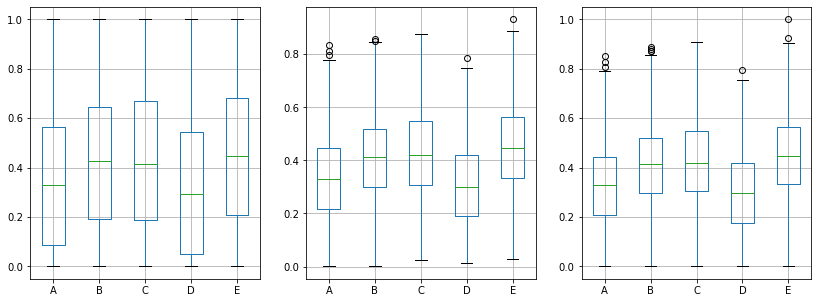

In [538]:
t = [1]*6
a = [0]*6
w = [1] + [0]*5

d_A = cal_post_mu(mu=list(a_d.A), s=[1,1,1,1,1,1], t=t, w=w, a=a)
d_B = cal_post_mu(mu=list(a_d.B), s=[1,1,1,1,1,1], t=t, w=w, a=a)
d_C = cal_post_mu(mu=list(a_d.C), s=[1,1,1,1,1,1], t=t, w=w, a=a)
d_D = cal_post_mu(mu=list(a_d.D), s=[1,1,1,1,1,1], t=t, w=w, a=a)
d_E = cal_post_mu(mu=list(a_d.E), s=[1,1,1,1,1,1], t=t, w=w, a=a)

eu = pd.DataFrame()
var = "eu"
eu["A"] = pd.DataFrame(d_A["eu"])[0]
eu["B"] = pd.DataFrame(d_B["eu"])[0]
eu["C"] = pd.DataFrame(d_C["eu"])[0]
eu["D"] = pd.DataFrame(d_D["eu"])[0]
eu["E"] = pd.DataFrame(d_E["eu"])[0]

pr = pd.DataFrame()
var = "eu_pr"
pr["A"] = pd.DataFrame(d_A[var])[0]
pr["B"] = pd.DataFrame(d_B[var])[0]
pr["C"] = pd.DataFrame(d_C[var])[0]
pr["D"] = pd.DataFrame(d_D[var])[0]
pr["E"] = pd.DataFrame(d_E[var])[0]

pw = pd.DataFrame()
var = "eu_pw"
pw["A"] = pd.DataFrame(d_A[var])[0]
pw["B"] = pd.DataFrame(d_B[var])[0]
pw["C"] = pd.DataFrame(d_C[var])[0]
pw["D"] = pd.DataFrame(d_D[var])[0]
pw["E"] = pd.DataFrame(d_E[var])[0]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 5))
plt.figsize=(5,15)

eu.boxplot(ax=ax1)
pr.boxplot(ax=ax2)
pw.boxplot(ax=ax3)

Idea 1) Mark true mean on each graph


Discussion:
-Distribution width
-Compare with true mean

For each case, calculate PDS, expected utility, p(true)

In [543]:
pd.DataFrame(d_A["x"])[0].mean()
pd.DataFrame(d_B["x"])[0].mean()
pd.DataFrame(d_C["x"])[0].mean()
pd.DataFrame(d_D["x"])[0].mean()
pd.DataFrame(d_E["x"])[0].mean()



0.45157770769808164

In [544]:
pd.DataFrame(d_B["x"])[0].mean()


0.40938367229610356

In [545]:
pd.DataFrame(d_C["x"])[0].mean()


0.42810303230745067

In [552]:
import numpy as np
from sklearn.datasets import load_diabetes 
from sklearn.metrics import mean_squared_error

# load the data
X, y = load_diabetes(return_X_y=True) 
print(X.shape, y.shape)
# division into training and testing
np.random.seed(42)
order = np.random.permutation(len(y)) 
tst = np.sort(order[:221])
tr = np.sort(order[221:])
Xtr = X[tr, :] 
Xtst = X[tst, :] 
Ytr = y[tr]
Ytst = y[tst]





(442, 10) (442,)


In [553]:
Xtr

array([[-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.00538306, -0.04464164, -0.03638469, ..., -0.00259226,
        -0.03199144, -0.04664087],
       [ 0.04170844,  0.05068012,  0.06169621, ..., -0.00259226,
        -0.01495648,  0.01134862],
       ...,
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
        -0.03845911, -0.03835666],
       [-0.00551455,  0.05068012, -0.01590626, ...,  0.03430886,
        -0.01811827,  0.04448548],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [554]:
Xtst

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, ...,  0.03430886,
         0.02269202, -0.00936191],
       ...,
       [ 0.04170844,  0.05068012,  0.01966154, ..., -0.00259226,
         0.03119299,  0.00720652],
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034]])

In [557]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(Xtr, Ytr)






In [562]:
math.sqrt(np.mean(np.square(reg.predict(Xtst)-Ytst)))

166.13636616120564

In [422]:
pd.DataFrame(d_B["x"]).describe()


,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.420706,0.419421,0.413924,0.425480,0.427670
std,0.135674,0.130435,0.132845,0.133668,0.132138
min,0.132452,0.135101,0.128067,0.160319,0.148242
25%,0.322707,0.325384,0.316497,0.322732,0.332003
50%,0.414710,0.414414,0.414699,0.423620,0.422315
75%,0.516577,0.507572,0.505578,0.518337,0.511953
max,0.792226,0.789688,0.801242,0.793689,0.788244


In [423]:
pd.DataFrame(d_C["x"]).describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.433439,0.433945,0.434594,0.435023,0.429776
std,0.134875,0.131958,0.134854,0.132662,0.133283
min,0.119018,0.137077,0.130096,0.130351,0.124977
25%,0.333316,0.339955,0.336128,0.339477,0.332851
50%,0.436154,0.434300,0.432690,0.436648,0.424922
75%,0.525777,0.526823,0.527928,0.529309,0.521564
max,0.800643,0.815974,0.790206,0.800747,0.776735


In [350]:
pd.DataFrame(d_D["x"]).describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.655014,0.654052,0.654344,0.654631,0.654942
std,0.020543,0.020569,0.020518,0.021203,0.021682
min,0.595840,0.601204,0.600658,0.597620,0.593145
25%,0.640096,0.640295,0.640036,0.639732,0.640316
50%,0.653799,0.653467,0.653600,0.653817,0.653594
75%,0.667736,0.666551,0.667683,0.667948,0.669192
max,0.740550,0.736843,0.720152,0.732558,0.742215


In [351]:
pd.DataFrame(d_E["x"]).describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.658814,0.658129,0.658622,0.658197,0.659177
std,0.023818,0.023558,0.023181,0.022952,0.024137
min,0.594028,0.590100,0.592323,0.595433,0.592349
25%,0.641812,0.641265,0.643276,0.642132,0.642063
50%,0.658683,0.658098,0.659332,0.658333,0.659646
75%,0.675418,0.674215,0.674026,0.674132,0.675388
max,0.725721,0.726974,0.734148,0.733752,0.732509


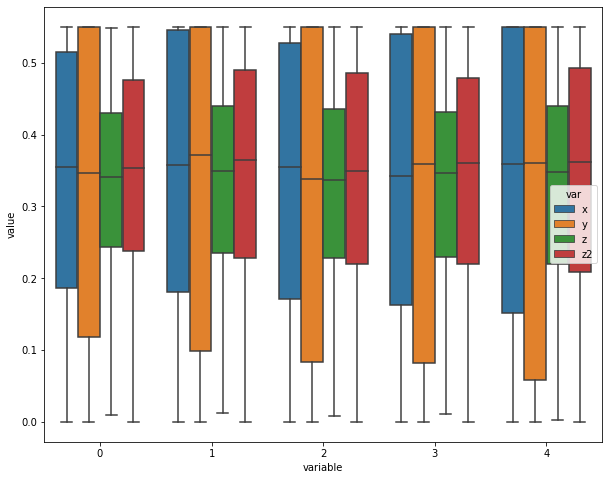

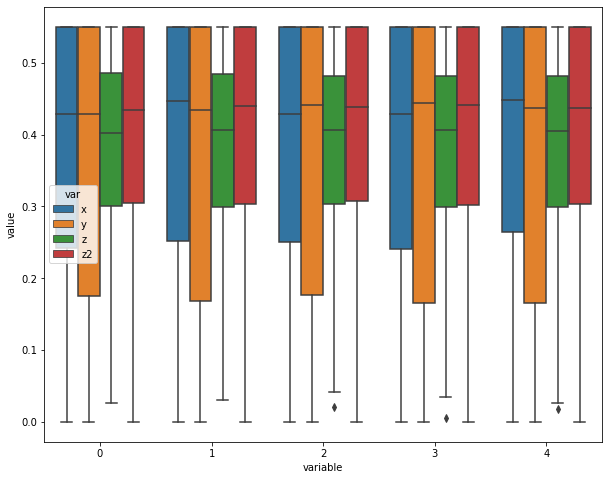

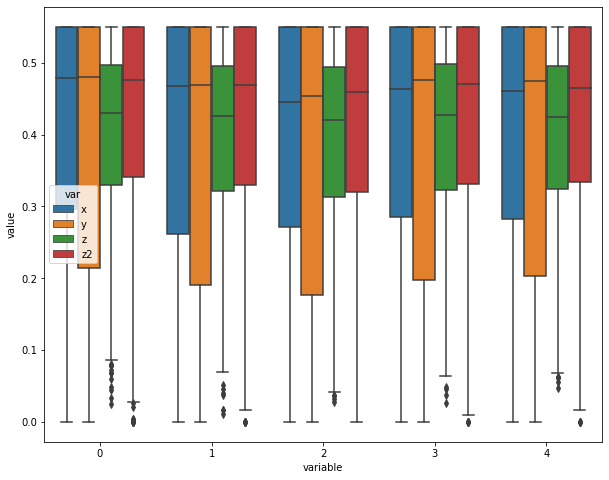

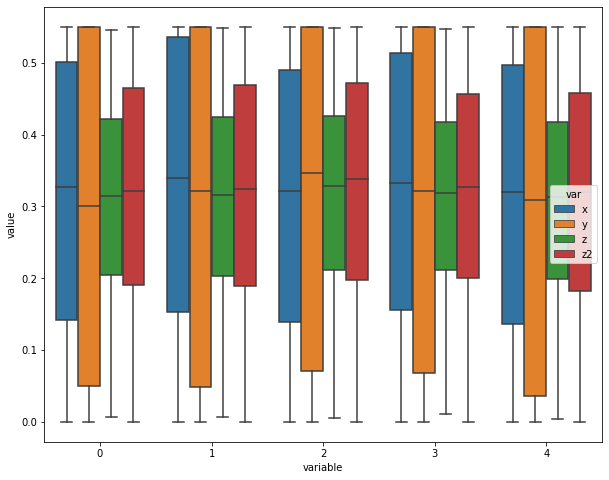

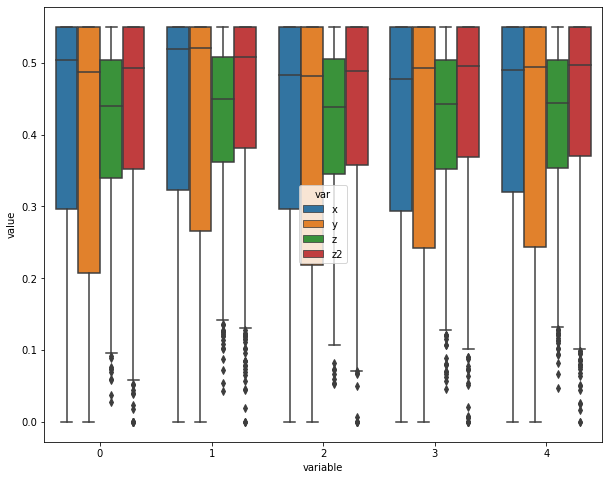

In [247]:
df_A = dr_graph(d_A)
df_B = dr_graph(d_B)
df_C= dr_graph(d_C)
df_D = dr_graph(d_D)
df_E = dr_graph(d_E)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eee611f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7ed52966a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eee611bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ed5296dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ed529d190>],
 'means': []}

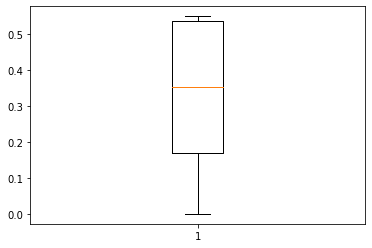

In [253]:
plt.boxplot(df_A[df_A["var"] == "x"].value)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7ed55acf10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7ed55b8670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7ed55acb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ed55b8e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ef1d2c100>],
 'means': []}

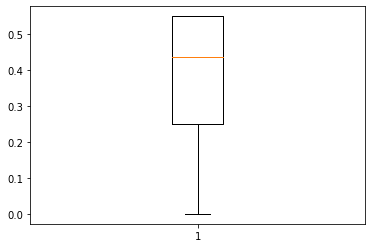

In [255]:
plt.boxplot(df_B[df_B["var"] == "x"].value)

In [ ]:
sns.boxplot(data = pd.concat([df_A[df_A.variable==0],
                              df_B[df_B.variable==1],
                             df_C[df_C.variable==2],
                             df_D[df_D.variable==3],
                             df_E[df_E.variable==4]]), x="variable", y="value", hue="var")
plt.xlabel("alternative")

plt.ylim(0.8, 1.01)

In [53]:
d2 = cal_post_mu(a=[1,1,1,1,1,1])

In [246]:
def dr_graph(d2):
    dx = pd.melt(pd.DataFrame(d2["x"]))
    dx["var"] = "x"
    dy = pd.melt(pd.DataFrame(d2["eu"]))
    dy["var"] = "y"
    dz = pd.melt(pd.DataFrame(d2["eu_pr"]))
    dz["var"] = "z"
    dz2 = pd.melt(pd.DataFrame(d2["eu_pw"]))
    dz2["var"] = "z2"
    df = pd.concat([dx, dy, dz, dz2])
    plt.figure(figsize = (10,8))
    sns.boxplot(data = df, x = "variable", y = "value", hue="var")
    return df

In [113]:
def alt_df(d2):
    dx = pd.melt(pd.DataFrame(d2["x"]))
    dx["var"] = "x"
    dy = pd.melt(pd.DataFrame(d2["eu"]))
    dy["var"] = "y"
    dz = pd.melt(pd.DataFrame(d2["eu_pr"]))
    dz["var"] = "z"
    dz2 = pd.melt(pd.DataFrame(d2["eu_pw"]))
    dz2["var"] = "z2"
    df = pd.concat([dx, dy, dz, dz2])
    return df

In [267]:
alt_list = []
i=0
for alt in df.index:
    m_list = list(df.loc[alt])
    print("mu_list: ", m_list)
    print("i: ", i)
    r = alt_df(cal_post_mu(mu=m_list, t = [5]+[1]*5, a=[0]*6))
    alt_list.append(r[r["variable"]==i])
    i+=1
    print()
    
alt_list2 = []
i=0
for alt in df.index:
    m_list = list(df.loc[alt])
    print("mu_list: ", m_list)
    print("i: ", i)
    r = alt_df(cal_post_mu(mu=m_list, t = [5]+[1]*5, a=[2]+[0]*5))
    alt_list2.append(r[r["variable"]==i])
    i+=1
    print()

alt_list3 = []
i=0
for alt in df.index:
    m_list = list(df.loc[alt])
    print("mu_list: ", m_list)
    print("i: ", i)
    r = alt_df(cal_post_mu(mu=m_list, t = [5]+[1]*5, a=[-2]+[0]*5))
    alt_list3.append(r[r["variable"]==i])
    i+=1
    print()


mu_list:  [0.8333333333333339, 0.9999999999999996, 0.3571428571428572, 0.6666666666666661, 0.19999999999999996, 0.5]
i:  0

mu_list:  [0.3333333333333339, 0.9999999999999996, 0.5, 1.0, 0.6000000000000001, 1.0]
i:  1

mu_list:  [0.16666666666666607, 0.9999999999999996, 0.5, 1.0, 0.6000000000000001, 1.0]
i:  2

mu_list:  [0.9999999999999991, 0.0, 0.9999999999999998, 0.0, 0.0, 0.0]
i:  3

mu_list:  [0.0, 0.4444444444444442, 0.0, 0.33333333333333215, 1.0, 0.0]
i:  4

mu_list:  [0.8333333333333339, 0.9999999999999996, 0.3571428571428572, 0.6666666666666661, 0.19999999999999996, 0.5]
i:  0

mu_list:  [0.3333333333333339, 0.9999999999999996, 0.5, 1.0, 0.6000000000000001, 1.0]
i:  1

mu_list:  [0.16666666666666607, 0.9999999999999996, 0.5, 1.0, 0.6000000000000001, 1.0]
i:  2

mu_list:  [0.9999999999999991, 0.0, 0.9999999999999998, 0.0, 0.0, 0.0]
i:  3

mu_list:  [0.0, 0.4444444444444442, 0.0, 0.33333333333333215, 1.0, 0.0]
i:  4

mu_list:  [0.8333333333333339, 0.9999999999999996, 0.35714285714

In [302]:
dd['var'] = pd.Categorical(dd['var'], ["z", "z2", "y","x"])
dd = dd.sort_values(by="var")


In [303]:
dd

,variable,value,var
2995,2,0.501857,z
1555,1,0.546176,z
1556,1,0.619239,z
1557,1,0.513741,z
1558,1,0.536349,z
...,...,...,...
4009,4,0.644583,x
4008,4,0.511091,x
4007,4,0.015043,x
4014,4,0.427298,x


In [304]:

dd2['var'] = pd.Categorical(dd2['var'], ["z", "z2", "y","x"])
dd2 = dd2.sort_values(by="var")


In [305]:
dd2

,variable,value,var
3999,3,0.505291,z
3004,3,0.524587,z
3003,3,0.561349,z
3002,3,0.588935,z
3001,3,0.579100,z
...,...,...,...
2003,2,0.129439,x
2004,2,0.197727,x
2005,2,0.294558,x
4002,4,0.240693,x


In [306]:

dd3['var'] = pd.Categorical(dd3['var'], ["z", "z2", "y","x"])
dd3 = dd3.sort_values(by="var")

In [307]:
dd3

,variable,value,var
3999,3,0.511103,z
3004,3,0.458074,z
3003,3,0.494864,z
3002,3,0.485458,z
3001,3,0.610097,z
...,...,...,...
2003,2,0.880640,x
2004,2,0.930160,x
2005,2,0.295254,x
4002,4,0.114130,x


/var/folders/m0/4kgydjmn6590r2xq4gdjzq3m0000gn/T/ipykernel_32196/1737895579.py:3: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


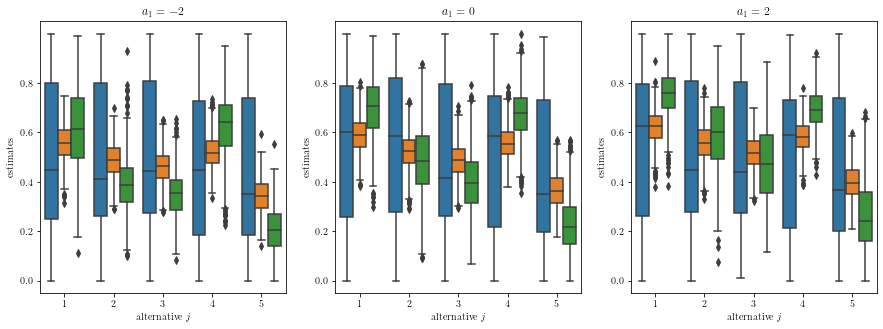

In [308]:
plt.rc("font", family="serif")
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

plt.figure(figsize=(15, 5))

yticks = list(np.arange(0, 1, 0.2))

ylabel = "estimates"

plt.subplot(132)
dd= pd.concat([alt_list[0],alt_list[1],alt_list[2],alt_list[3],alt_list[4]])
ax = sns.boxplot(data = dd[dd["var"]!="x"], x = "variable", y = "value", hue="var")
plt.yticks(yticks)
plt.xlabel(r"alternative $j$")
plt.ylabel(ylabel)
ax.set_xticklabels([1,2,3,4,5])
ax.get_legend().remove()

plt.title(r"$a_1=0$")

plt.subplot(133)
dd2= pd.concat([alt_list2[0],alt_list2[1],alt_list2[2],alt_list2[3],alt_list2[4]])
ax= sns.boxplot(data = dd2[dd2["var"]!="x"], x = "variable", y = "value", hue="var")
plt.yticks(yticks)
plt.xlabel(r"alternative $j$")
plt.ylabel(ylabel)
ax.set_xticklabels([1,2,3,4,5])
ax.get_legend().remove()
plt.title(r"$a_1=2$")


plt.subplot(131)
dd3= pd.concat([alt_list3[0],alt_list3[1],alt_list3[2],alt_list3[3],alt_list3[4]])
ax= sns.boxplot(data = dd3[dd3["var"]!="x"], x = "variable", y = "value", hue="var")
plt.yticks(yticks)
plt.xlabel(r"alternative $j$")
plt.ylabel(ylabel)
ax.set_xticklabels([1,2,3,4,5])
ax.get_legend().remove()


plt.title(r"$a_1=-2$")
plt.savefig('con.eps', format='eps')

In [271]:
#a=0
print(dd[dd["var"]=="x"].groupby("variable").mean())
print(dd[dd["var"]=="y"].groupby("variable").mean())
print(dd[dd["var"]=="z"].groupby("variable").mean())
print(dd[dd["var"]=="z2"].groupby("variable").mean())

             value
variable          
0         0.595549
1         0.527288
2         0.490849
3         0.559064
4         0.375962
             value
variable          
0         0.529586
1         0.546353
2         0.515317
3         0.493364
4         0.450778
             value
variable          
0         0.590235
1         0.522901
2         0.486902
3         0.557290
4         0.367532
             value
variable          
0         0.698845
1         0.489382
2         0.400765
3         0.674286
4         0.227356


In [272]:
#a=2
print(dd2[dd2["var"]=="x"].groupby("variable").mean())
print(dd2[dd2["var"]=="y"].groupby("variable").mean())
print(dd2[dd2["var"]=="z"].groupby("variable").mean())
print(dd2[dd2["var"]=="z2"].groupby("variable").mean())

             value
variable          
0         0.628676
1         0.560312
2         0.527547
3         0.586288
4         0.399740
             value
variable          
0         0.535426
1         0.534493
2         0.530528
3         0.487699
4         0.457663
             value
variable          
0         0.622675
1         0.557198
2         0.518147
3         0.582577
4         0.397893
             value
variable          
0         0.757058
1         0.592182
2         0.472026
3         0.694700
4         0.266353


In [273]:
#a=-2
print(dd3[dd3["var"]=="x"].groupby("variable").mean())
print(dd3[dd3["var"]=="y"].groupby("variable").mean())
print(dd3[dd3["var"]=="z"].groupby("variable").mean())
print(dd3[dd3["var"]=="z2"].groupby("variable").mean())

             value
variable          
0         0.561851
1         0.473306
2         0.458035
3         0.521091
4         0.343392
             value
variable          
0         0.512747
1         0.515199
2         0.530238
3         0.460951
4         0.448169
             value
variable          
0         0.555407
1         0.487126
2         0.458624
3         0.521021
4         0.342252
             value
variable          
0         0.615353
1         0.392235
2         0.349064
3         0.624008
4         0.207555


In [ ]:
alt_df[cal_post_mu(mu=list(df.loc["A"]), a=[0]*6)]


,variable,value,var
0,0,0.909225,x
1,0,0.780037,x
2,0,0.953447,x
3,0,0.949939,x
4,0,0.942844,x
...,...,...,...
4995,4,0.909010,z2
4996,4,0.946589,z2
4997,4,0.892510,z2
4998,4,0.919502,z2


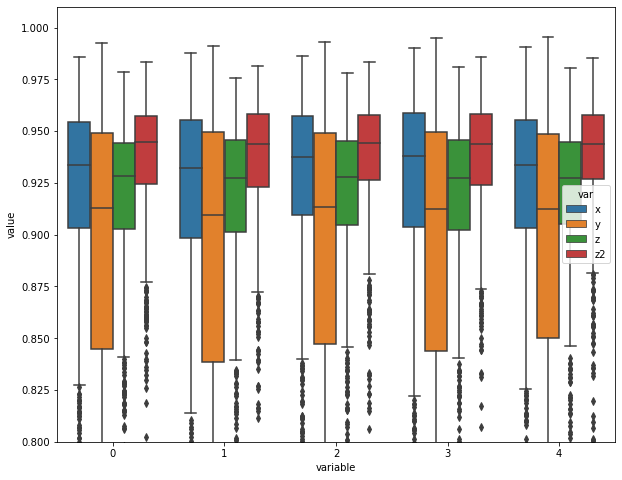

In [112]:
dr_graph(d2)

In [58]:
d3 = cal_post_mu(a=[-1,-1,-1,-1,-1,-1])

In [59]:
d4 = cal_post_mu(a=[1,1,1,1,1,1], t=[0.1]*6)

In [109]:
df["mu"] = df["bid"]*w[0] + df["fin"]*w[1]+ df["tec"]*w[2]+ df["mng"]*w[3]+ df["has"]*w[4]+ df["rep"]*w[5]

In [110]:
df["mu"]

A    0.745714
B    0.563333
C    0.471667
D    0.650000
E    0.150000
Name: mu, dtype: float64

In [ ]:
cal_post_mu(mu=)